# Telco Churn Analysis
This data science project aims to identify the root causes of customer departures and develop a predictive model to assist in mitigating churn risk.

## <ins>Imports</ins>

In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd

## <ins>Acquire</ins>

* In the Acquire phase, we obtained the data from the Codeup MySQL database `telco_churn`.
* The dataset is comprised of 7,043 rows and 22 columns.
* Every row corresponds to a distinct Telco customer & each column signifies a specific customer attribute.

In [2]:
# Acquiring data using acquire_data() from acquire.py
# Assigning the result to the variable 'df'

df = a.acquire_data()

## <ins>Prepare</ins>

* Remove duplicate columns (`payment_type_id`, `internet_service_type_id`, `contract_type_id`) as the same data is available elsewhere.
* Introduce `internet_service` column to signify customer subscription to internet service.
* Adjust values and datatypes:
    * Convert `senior_citizen` values from '1 or 0' to 'Yes or No'.
    * Convert `churn values` from 'Yes or No' to '1 or 0'.
    * Fill null values in `internet_service_type` with 'No internet service'.
    * Convert `total_charges` values to float.
* Set the index to `customer_id` for unique identification.
* Split data into three dataframes based on `churn`:
    * Train (60% of the original dataframe)
    * Validate (20% of the original dataframe)
    * Test (20% of the original dataframe)
* Retain all data points; no outliers have been removed.

In [3]:
# Calling prepare_data() from prepare.py to process and modify the DataFrame 'df'
# Assigning back to the variable 'df'

df = p.prepare_data(df)

In [4]:
# Splitting the DataFrame 'df' into training, validation, and test sets using the 'churn' column for stratification
# The resulting subsets are assigned to variables 'train', 'validate', and 'test'

train, validate, test = p.split_data(df,'churn')

In [5]:
# Displaying a few rows of the 'train' DataFrame for a quick glimpse

train.tail(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
2262-SLNVK,Female,No,No,No,1,Yes,No,Yes,No,No,...,No,No,No,No,70.10,70.10,0,Month-to-month,Fiber optic,Electronic check
0404-AHASP,Male,No,Yes,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.70,1421.90,0,Two year,No internet service,Credit card (automatic)
7767-UXAGJ,Male,No,No,No,1,Yes,Yes,Yes,No,No,...,No,No,No,Yes,50.45,50.45,1,Month-to-month,DSL,Electronic check
0603-OLQDC,Male,No,No,Yes,12,Yes,No,Yes,Yes,No,...,No,Yes,Yes,Yes,69.85,837.50,0,Month-to-month,DSL,Mailed check
5480-HPRRX,Female,Yes,No,No,3,No,No phone service,Yes,No,No,...,No,No,No,No,25.30,77.75,1,Month-to-month,DSL,Electronic check


## <ins>Exploratory Analysis</ins>

During the exploration phase, we address the following questions:

* How often are customers churning
* What is the influence of tenure on the churn rate?
* How does the monthly charges amount correlate with the churn rate?
* What impact does the contract type have on the churn rate?

By examining these aspects, we aim to gain insights into the patterns and factors contributing to customer churn within our dataset.

### How often do customers churn?

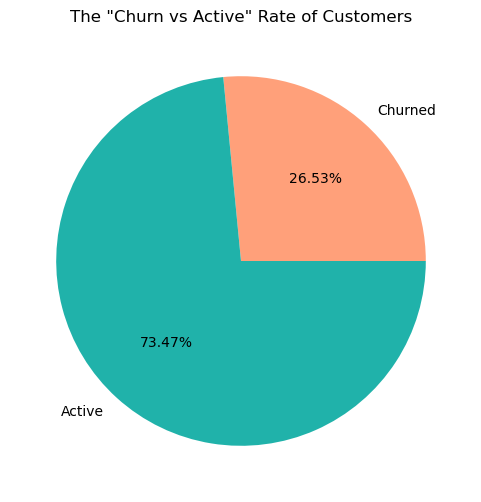

In [6]:
# Creating a pie chart visualization of churn distribution using pie_churn() from explore.py

e.pie_churn(train)

> When using the training data, we observe a churn rate of 26.53%.

### What is the influence of tenure on the churn rate?

Hypotheses:
> $H_0$: There is NO relationship between tenure and the churn rate.

> $H_a$: There IS a relationship between tenure and the churn rate.

Significance Level:
> Confidence Interval: 95%

> Alpha (Significance Level): 0.05

Methodology:
>To compare the non-normally distributed continuous variable (tenure) with the categorical variable (churn rate), we will employ the Mann-Whitney test. 

In [7]:
# Performing Mann-Whitney test on the 'tenure' & 'churn' variables using mann_whitney_tenure() from explore.py

e.mann_whitney_tenure(train)

p-value: 0.0000
There IS a relationship between tenure & churn rate!


Visualization:

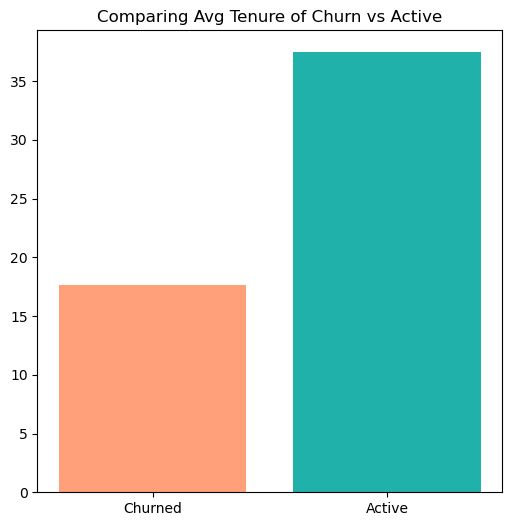

In [8]:
# Creating a bar chart visualization for the 'tenure' variable using bar_tenure() from explore.py

e.bar_tenure(train)

> On average, active customers have a higher tenure, while churned customers exhibit lower tenure, supporting the hypothesis that tenure DOES influence the churn rate.

### How does the monthly charges amount correlate with the churn rate?

Hypotheses:
> $H_0$: There is NO relationship between monthly charges and the churn rate.

> $H_a$: There IS a relationship between monthly charges and the churn rate.

Significance Level:
> Confidence Interval: 95%

> Alpha (Significance Level): 0.05

Methodology:
>To compare the non-normally distributed continuous variable (monthly charges) with the categorical variable (churn rate), we will employ the Mann-Whitney test. 

In [9]:
# Performing Mann-Whitney test on the 'monthly_charges' & 'churn' variables using mann_whitney_tenure() from explore.py

e.mann_whitney_monthly_charges(train)

p-value: 0.000000
There IS a relationship between monthly_charges & churn rate!


Visualization:

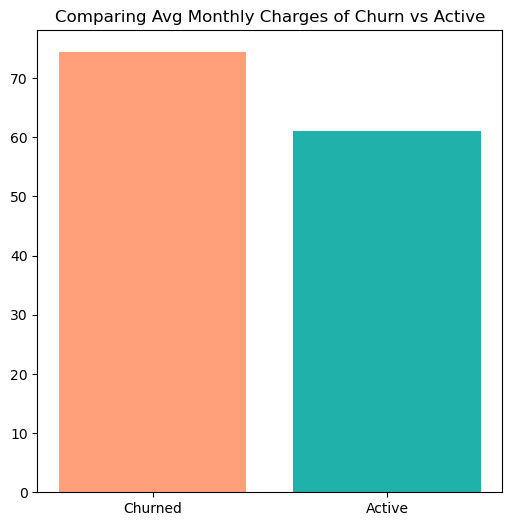

In [10]:
# Creating a bar chart visualization for the 'monthly_charges' variable using bar_monthly_charges() from explore.py

e.bar_monthly_charges(train)

> On average, active customers have lower monthly charges while churned customers exhibit higher monthly charges, supporting the hypothesis that monthly charges DO influence the churn rate.

### What impact does the contract type have on the churn rate?

Hypotheses:
> $H_0$: There is NO relationship between contract_type & churn rate

> $H_a$: There IS a relationship between contract_type & churn rate

Significance Level:
> Confidence Interval: 95%

> Alpha (Significance Level): 0.05

Methodology:
>To compare two categorical variables (contract_type & churn), we will employ the $χ^2$ test. 

In [11]:
# Performing chi2 test on the 'contract_type' & 'churn' variables using chi_squared_contract_type() from explore.py

e.chi_squared_contract_type(train)

p-value: 0.0000
There IS a relationship between contract_type & churn rate!


Visualization:

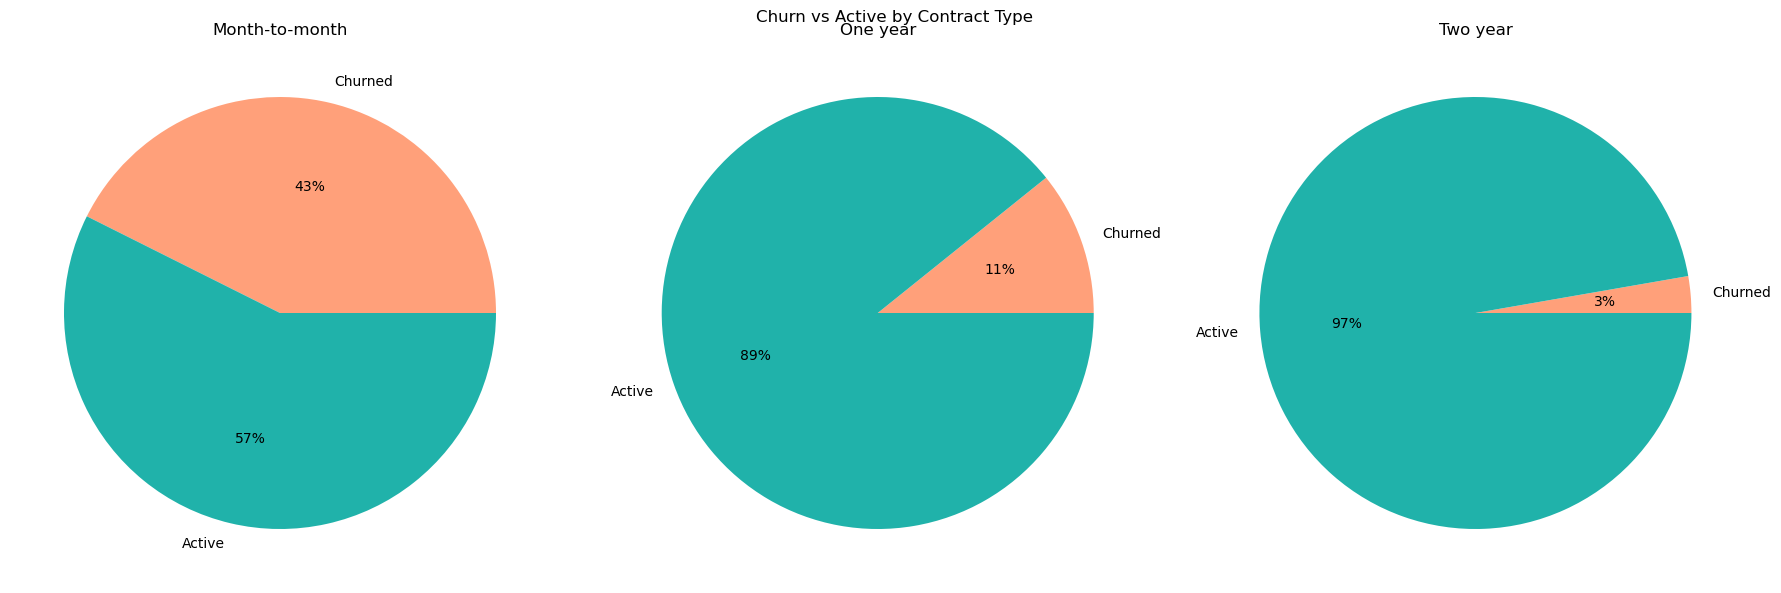

In [12]:
# Creating a pie chart visualization for churn distribution by contract type
# Using the pie_churn_by_contract_type() method from explore.py

e.pie_churn_by_contract_type(train)

> Customers with month-to-month contracts exhibit a significantly higher churn rate compared to those with longer-term contracts, supporting the hypothesis that contract types DO influence churn rate.

### Summary:
Confirmed influences of tenure, monthly charges, and contract types on customer churn will guide predictive model development, enhancing our understanding and prediction of churn in the modeling phase.

## <ins>Model</ins>

### Preprocessing

* replaced `No phone service` with `No` from `multiple_lines` (this info is in the `phone_service` column)
* replaced `No internet service` with `No` from: (this info is in the `internet_service` column)
    * `online_security`
    * `online_backup`
    * `device_protection`
    * `tech_support`
    * `streaming_tv`
    * `streaming_movie`
* encoded our train, validate, test dfs for our categorical columns

In [13]:
# Preprocessing the train, validate, and test DataFrames using preprocess() from model.py

train, validate, test = m.preprocess(train, validate, test)

### Baseline Accuracy

In [14]:
# Baseline accuracy is obtained by subtracting the mean of 'churn' from 1

1-train.churn.mean()

0.7346745562130177

### Decision Tree

In [15]:
# Call decision_tree() and store the test accuracy in 'test_acc_dt'

test_acc_dt = m.decision_tree(train,validate,test)

Train Accuracy: 0.7957
Validate Accuracy: 0.7935


### Random Forest

In [16]:
# Call random_forest() and store the test accuracy in 'test_acc_rf'

test_acc_rf = m.random_forest(train, validate, test)

Train Accuracy: 0.7915
Validate Accuracy: 0.7984


### KNN 

In [17]:
# Call knn() and store the test accuracy in 'test_acc_knn'

test_acc_knn = m.knn(train,validate,test)

Train Accuracy: 0.8031
Validate Accuracy: 0.7807


### Logistic Regression

In [18]:
# Call logistic_regression() and store the test accuracy in 'test_acc_logit'

test_acc_logit = m.logistic_regression(train,validate,test)

Train Accuracy: 0.8095
Validate Accuracy: 0.8105


## <ins>Evaluation</ins>

> When reviewing the accuracies of the models above, Logistic Regression was MARGINALLY better.

> We selected this as our final model for test data evaluation.

In [19]:
test_acc_logit

0.7977288857345636

> Our final model achieved an accuracy of 79.77% on the test data, surpassing the baseline accuracy. While this is a positive outcome, it's important to note that accuracy alone may not be the sole metric for success.

## <ins>Conclusion</ins>

### Recommendations: 

> **Customer Loyalty Programs:** used to encourage long-term customers to stay with the company.

> **Promotions for Longer Contracts:** such as discounts for customers willing to commit to one-year or two-year contracts.


### Next Steps: 
> **Continuous Monitoring:** continue to monitor customer churn and model performance - updating the model with new data as it becomes available.

In conclusion, our Telco Churn Analysis project has provided valuable insights into the factors influencing customer churn. The Logistic Regression model offers a practical tool for identifying and addressing churn risk. By implementing the recommendations and staying proactive with continuous monitoring, we can strengthen customer retention and contribute to the long-term success of this company.